## Brownian Walker—Functionality Demonstration

### 1. Simple Brownian Walk generation with Gaussian Kernel

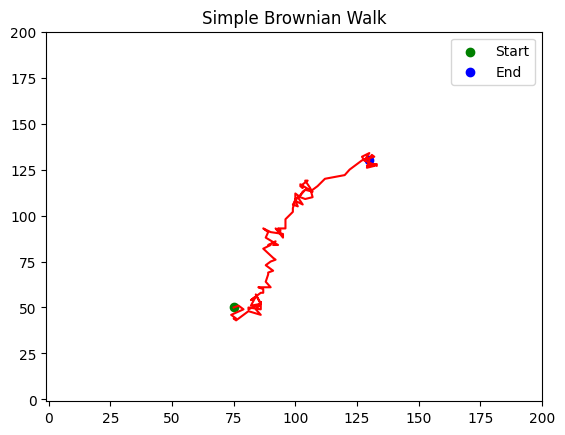

In [16]:
from random_walk_package.core.BrownianWalker import BrownianWalker

with BrownianWalker(T=100, W=200, H=200, S=5) as walker:
    walker.generate(start_x=75, start_y=50)
    path1 = walker.backtrace(end_x=130, end_y=130, plot=True, plot_title="Simple Brownian Walk")

### 2. Define custom kernels like this:

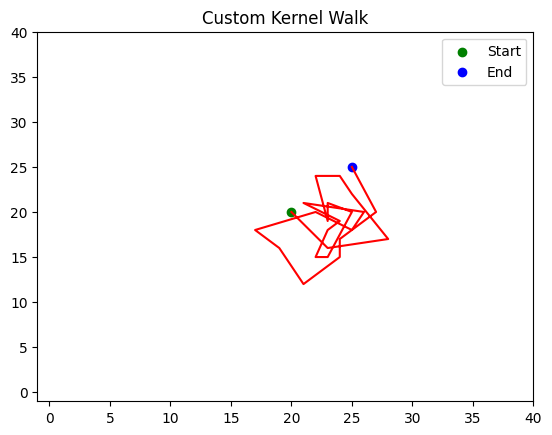

In [17]:
import numpy as np

S = 5
with BrownianWalker(T=25, W=40, H=40) as walker:
    custom_kernel = np.random.rand(2 * S + 1, 2 * S + 1).astype(np.float64)
    custom_kernel /= custom_kernel.sum()
    walker.set_kernel(custom_kernel, S=S)
    walker.generate(start_x=20, start_y=20)
    path2 = walker.backtrace(end_x=25, end_y=25, plot=True, plot_title="Custom Kernel Walk")
    print(f"Länge des Pfads: {len(path2)} Punkte")

## 3. Terrain-based generation

- Terrain Objects influence how the Walker moves. They are defined by text files as 'delim' separated MESA landcover values.
- Different landmark types receive different kernel parameters. Water areas are avoided in this example. Customize Kernel Mapping based on animal type or use case. There are four presets: LIGHT, MEDIUM, HEAVY, AMPHIBIAN, AIRBORNE with pre-defined kernel parameters. Kernel Parameters include step_size, diffusity, width and height and can be fully customized
- Note: Once passed to the Walker Object, the Walker takes ownership of the allocated memory of terrain and kernel_mapping

In [18]:
from random_walk_package.bindings.data_structures.kernel_terrain_mapping import *
from random_walk_package.bindings import *

terrain = create_terrain_map('terrain_baboons.txt', ' ')
print(terrain.contents.width, terrain.contents.height)
kernel_mapping = create_brownian_kernel_parameters(animal_type=MEDIUM, base_step_size=7)
set_landmark_mapping(kernel_mapping, GRASSLAND, is_brownian=True, step_size=10, directions=1, diffusity=1)
set_landmark_mapping(kernel_mapping, TREE_COVER, is_brownian=True, step_size=2, directions=1, diffusity=2.6)
set_forbidden_landmark(kernel_mapping, WATER)
# hier noch die dinger plotten also kernels und terrain


Now the terrain based walk can be created with the parameters above (if no custom kernel mapping is passed, a default one is used)

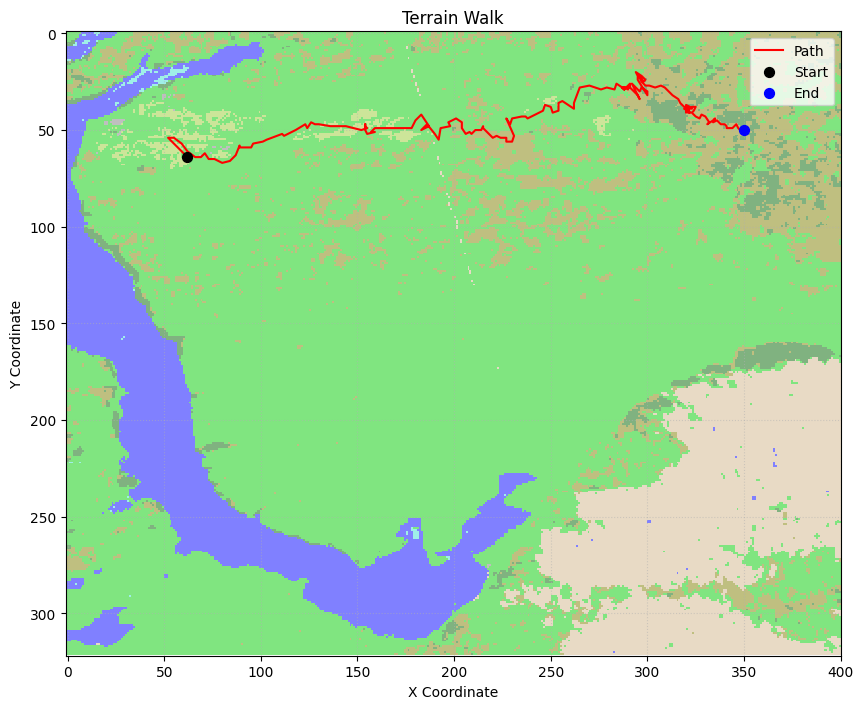

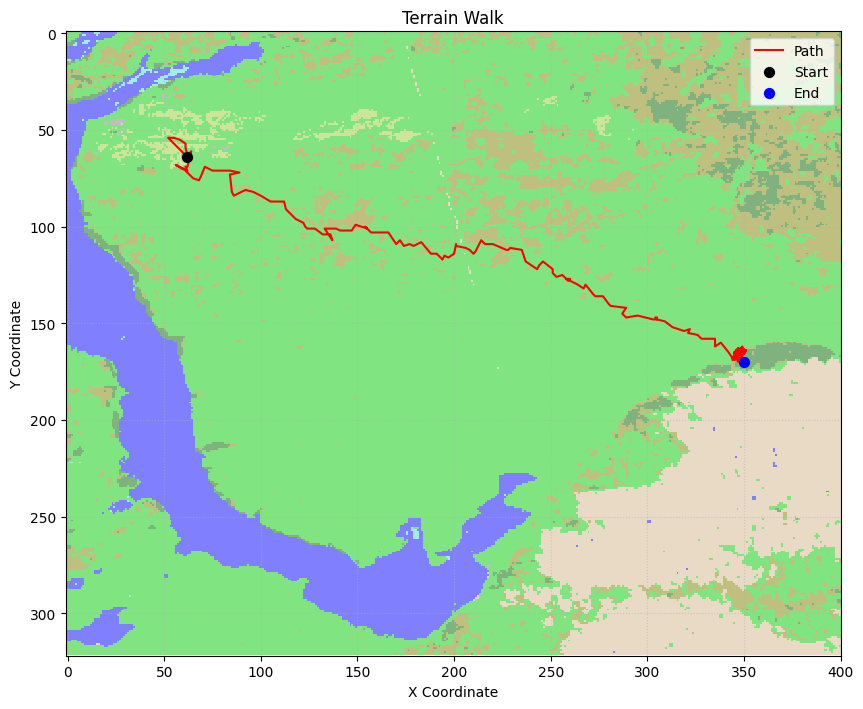

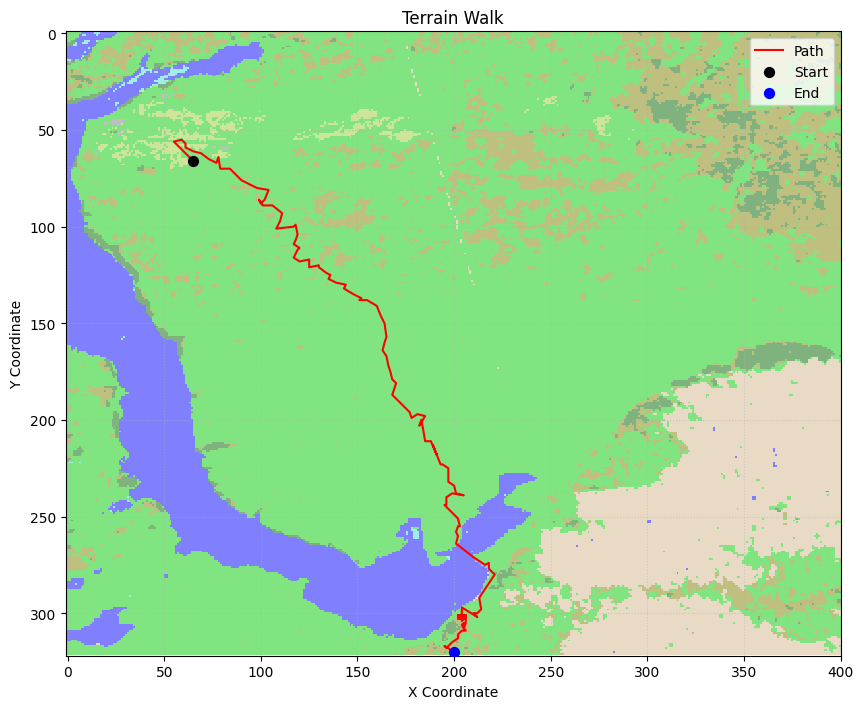

In [19]:
walker = BrownianWalker(T=200, terrain=terrain, k_mapping=kernel_mapping)
walker.generate_from_terrain(start_x=50, start_y=50)

path3 = walker.backtrace_from_terrain(end_x=350, end_y=50, plot=True)
print(f"   Terrain Walk: {len(path3)} Punkte")
path4 = walker.backtrace_from_terrain(end_x=350, end_y=170, plot=True)
print(f"   Terrain Walk: {len(path3)} Punkte")
path5 = walker.backtrace_from_terrain(end_x=200, end_y=320, plot=True)
print(f"   Terrain Walk: {len(path3)} Punkte")


Create multiple Brownian Walks by passing a list of tuples to the walker.

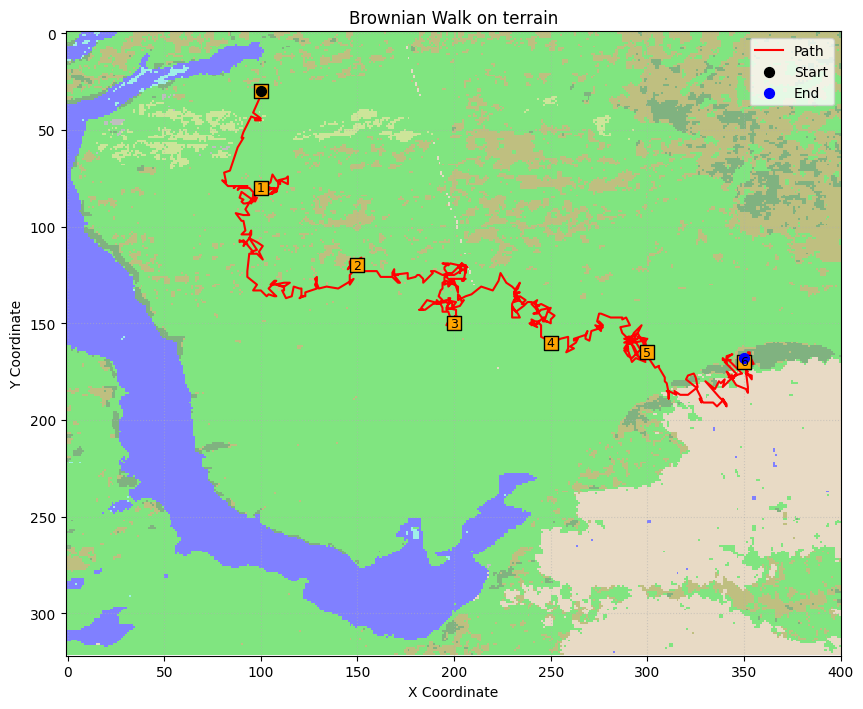

In [20]:
walker = BrownianWalker(T=100, terrain=terrain, k_mapping=kernel_mapping)

steps = [(100, 30), (100, 80), (150, 120), (200, 150), (250, 160), (300, 165), (350, 170)]
path3 = walker.generate_from_terrain_multistep(steps=steps, plot=True)
print(f"   Terrain Walk Multiple Steps: {len(path3)} Punkte")